In [1]:
import numpy as np
import scipy

In [2]:
small_6M_ppls = [
    (116.7, 114.9),  # (LTR ppl, RTL ppl)
    (117.4, 114.4),
    (116.7, 115.0),
    (117.4, 115.4),
    (117.5, 113.8),
    (116.1, 114.0)
]

In [11]:
# One-sided unpaired Welch t-test
small_ltr_ppls, small_rtl_ppls = np.array(small_6M_ppls).T
print(scipy.stats.ttest_ind(small_ltr_ppls, small_rtl_ppls, equal_var=False, alternative="greater"))
# Paired t-test
print(scipy.stats.ttest_rel(small_ltr_ppls, small_rtl_ppls, alternative="greater"))

TtestResult(statistic=6.996032521277681, pvalue=1.9799032618443016e-05, df=9.885322295882748)
TtestResult(statistic=7.357072921297962, pvalue=0.0003642557582314903, df=5)


In [12]:
# Permutation test
def statistic(x, y):
    return np.mean(x) - np.mean(y)

scipy.stats.permutation_test((small_ltr_ppls, small_rtl_ppls), statistic, n_resamples=np.inf, alternative="greater").pvalue

0.0010822510822510823

0.0010822510822510823

In [9]:
small_6M_losses = [
    (4.761364663504469, 4.744475745069383),
    (4.76577, 4.73966),  # (LTR loss, RTL loss)
    (4.7599, 4.74497),
    (4.76553, 4.74848),
    (4.76638, 4.73508),
    (4.75452, 4.73628)
]

In [10]:
small_ltr_losses, small_rtl_losses = np.array(small_6M_losses).T
print(scipy.stats.ttest_ind(small_ltr_losses, small_rtl_losses, equal_var=False, alternative="greater"))
print(scipy.stats.ttest_rel(small_ltr_losses, small_rtl_losses, alternative="greater"))
print(scipy.stats.permutation_test((small_ltr_losses, small_rtl_losses), statistic, n_resamples=np.inf, alternative="greater").pvalue)

TtestResult(statistic=7.221951304385972, pvalue=1.5856791940777708e-05, df=9.802083740534792)
TtestResult(statistic=7.866415444091634, pvalue=0.00026667826712639355, df=5)
0.0010822510822510823


In [23]:
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
csv_filename = '../data/wandb_export_2024-12-04T19_56_43.325-05_00.csv'
df = pd.read_csv(csv_filename)

In [25]:
df = df.drop([0, 1, 10, 11, 12, 15,16,17,18,19])

In [28]:
df["val_ppl"] = np.e ** df["val_loss"]

In [39]:
transferred_ppl = np.array([24.4, 24.4, 21.9, 21.8, 18.1, 17.7])  # (rtl, ltr, rtl, ltr, ...)

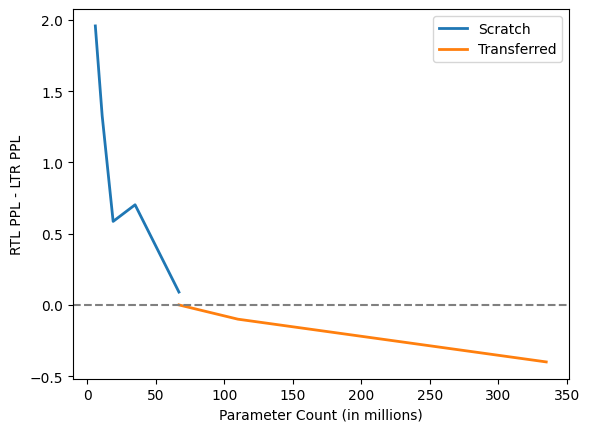

In [44]:
# Cringe hardcoding
plt.plot([6, 11, 19, 35, 67], np.array(df["val_ppl"])[1::2] - np.array(df["val_ppl"])[::2], linewidth=2, label="Scratch")
plt.plot([67, 110, 335], transferred_ppl[1::2] - transferred_ppl[::2], linewidth=2, label="Transferred")
plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel("Parameter Count (in millions)")
plt.ylabel("RTL PPL - LTR PPL")
plt.legend()

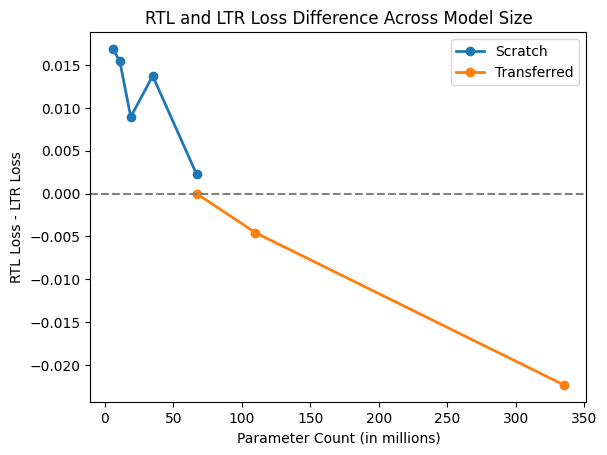

In [60]:
# Cringe hardcoding
plt.plot([6, 11, 19, 35, 67], np.array(df["val_loss"])[1::2] - np.array(df["val_loss"])[::2], linewidth=2, marker="o", label="Scratch")
plt.plot([67, 110, 335], np.log(transferred_ppl[1::2]) - np.log(transferred_ppl[::2]), linewidth=2, marker="o", label="Transferred")
plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel("Parameter Count (in millions)")
plt.ylabel("RTL Loss - LTR Loss")
plt.title("RTL and LTR Loss Difference Across Model Size")
plt.legend()

In [61]:
 pd.read_csv(csv_filename)

,Name,val_loss
0,distilbert_base_japan_rtl,2.832614
1,distilbert_base_japan_ltr,2.823765
2,bert_6M_rtl_scratch,4.744476
3,bert_6_ltr_scratch,4.761365
4,bert_11_rtl_scratch,4.446950
5,bert_11_ltr_scratch,4.462379
6,bert_19_rtl_scratch,4.177320
7,bert_19_ltr_scratch,4.186271
8,bert_35_rtl_scratch,3.927857
9,bert_35_ltr_scratch,3.941595
